In [1]:
import methods
import dgp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import importlib
import tqdm
import os
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/src/')
importlib.reload(methods)
importlib.reload(dgp)
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/notebooks/')
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid",font_scale=1.5)

Error in sort.list(n) : failed to open ICU collator (4)


In [2]:
df_exp_lalonde, df_obs_lalonde = dgp.lalonde()
df_exp_star, df_obs_star = dgp.project_star()

In [17]:
print(df_exp_lalonde.groupby(by='treat').mean().round(decimals=2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &    age &  education &  black &  hispanic &  married &  nodegree &         re75 &         re78 \\
treat &        &            &        &           &          &           &              &              \\
\midrule
0     &  24.45 &      10.19 &    0.8 &      0.11 &     0.16 &      0.81 &  3026.679932 &  5090.049805 \\
1     &  24.63 &      10.38 &    0.8 &      0.09 &     0.17 &      0.73 &  3066.100098 &  5976.350098 \\
\bottomrule
\end{tabular}



In [ ]:
ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_exp_lalonde,repeats=10)

 20%|██        | 2/10 [00:17<01:08,  8.60s/it]Exception ignored from cffi callback <function _processevents at 0x7fc67ef31940>:
Traceback (most recent call last):
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
 30%|███       | 3/10 [00:24<00:56,  8.07s/it]Exception ignored from cffi callback <function _processevents at 0x7fc67ef31940>:
Traceback (most recent call last):
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x7fc67ef31940>:
Traceback (most recent call last):
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x7fc67ef

Traceback (most recent call last):
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/sexp.py", line 611, in from_object
    res = cls.from_memoryview(mv)
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/conversion.py", line 45, in _
    cdata = function(*args, **kwargs)
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/rpy2/rinterface_lib/sexp.py", line 588, in from_memoryview
    raise ValueError(msg)
ValueError: Incompatible C type sizes. The R array type is 13 with 4 bytes per item while the Python array type is b with 1 byte per item.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/g3/6sg5xtl52899d59vg4dbv4s80000gn/T/ipykernel_5633

TypeError: object of type 'NoneType' has no len()

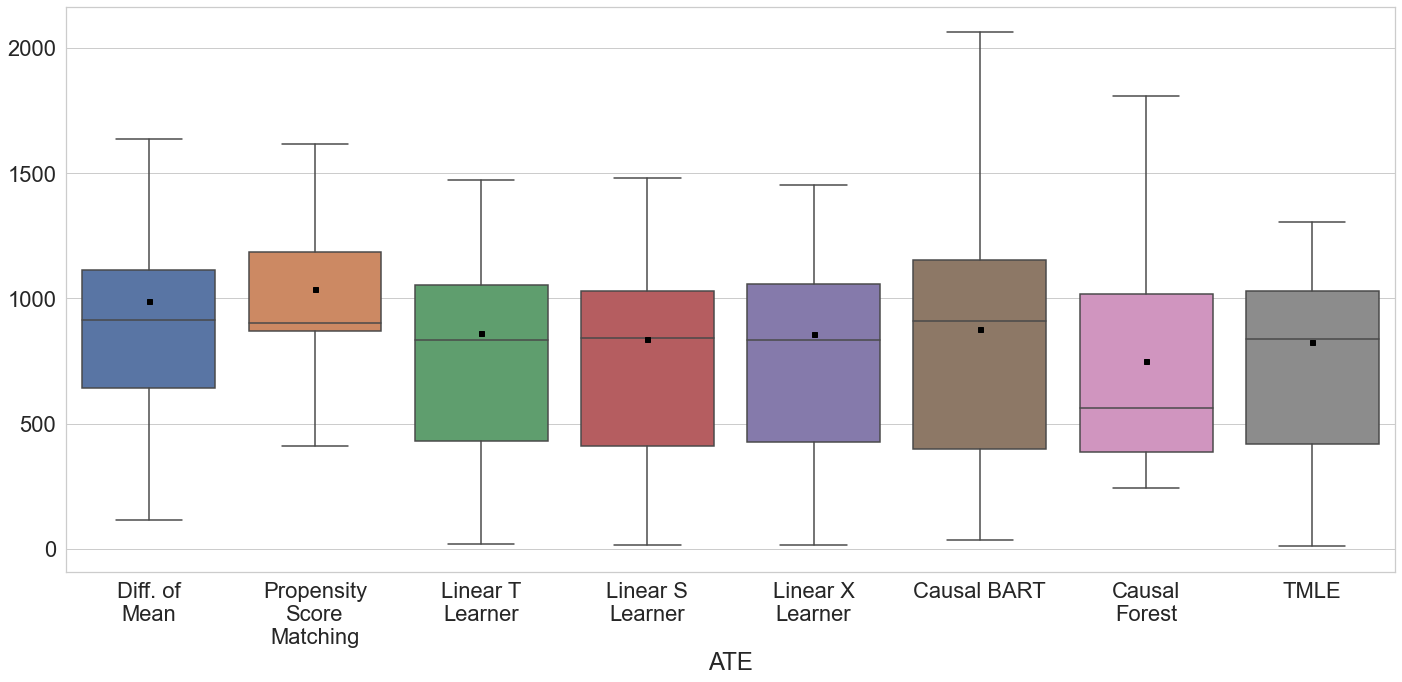

In [9]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest', 'TMLE']

width, height = 20, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_lalonde[order],orient='v',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.xticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.tight_layout()
fig.savefig('Figures/ate_lalonde_exp.png')


In [10]:
ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_obs_lalonde,repeats=10)

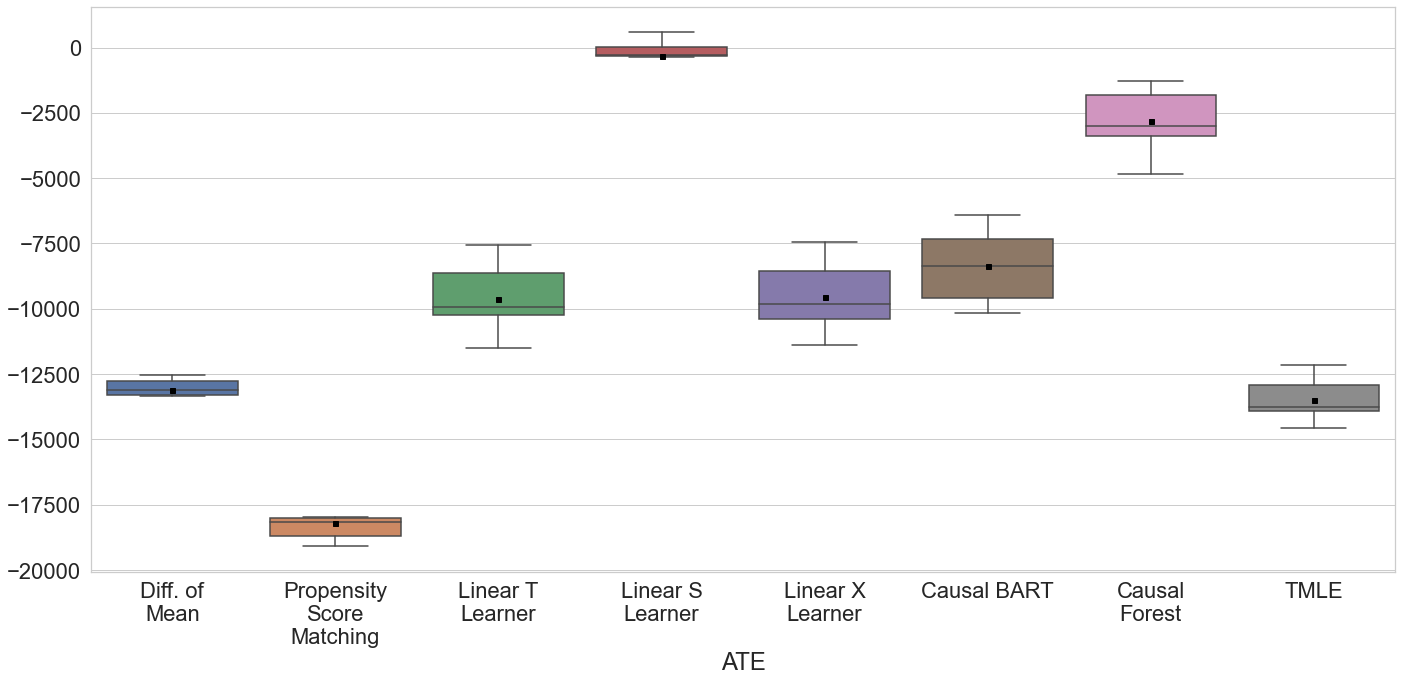

In [11]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest', 'TMLE']

width, height = 20, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_lalonde[order],orient='v',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.xticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.tight_layout()
fig.savefig('Figures/ate_lalonde_obs.png')



In [ ]:
ate_exp_star = df_exp_star.loc[df_exp_star['g3smallclass']==1,'g3avgscore'].mean() - df_exp_star.loc[df_exp_star['g3smallclass']==0,'g3avgscore'].mean()
ate_star = methods.bootstrap_ate_inference(outcome='g3avgscore',treatment='g3smallclass',data=df_obs_star,repeats=10)

In [ ]:
order = ['Diff. of Mean','Propensity Score Matching','Linear T Learner', 'Linear S Learner',
         'Linear X Learner', 'Causal BART', 'Causal Forest', 'TMLE', 'Doubly Robust (Linear)']

width, height = 20, 10
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=ate_star[order],orient='v',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.xticks(np.arange(0,len(order)),[textwrap.fill(e, 12) for e in order])
# plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('ATE')
plt.tight_layout()
fig.savefig('Figures/ate_star_exp.png')